# EDA

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../datasets/train_clean.csv')

## Time for my daily "Unnamed: 0" cleaning

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_train.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice,sell_diff,remod_diff,remod_x_sell
0,0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,2.0,475.0,Y,0,44,0,0,0,No,0,3,2010,WD,130500,34,5,170
1,1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,2.0,559.0,Y,0,74,0,0,0,No,0,4,2009,WD,220000,13,12,156
2,2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1.0,246.0,Y,0,52,0,0,0,No,0,1,2010,WD,109000,57,3,171
3,3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2.0,400.0,Y,100,0,0,0,0,No,0,4,2010,WD,174000,4,3,12
4,4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,2.0,484.0,N,0,59,0,0,0,No,0,3,2010,WD,138500,110,17,1870


In [5]:
df_train.drop(columns = ['Unnamed: 0'], inplace = True)

## Data Analysis

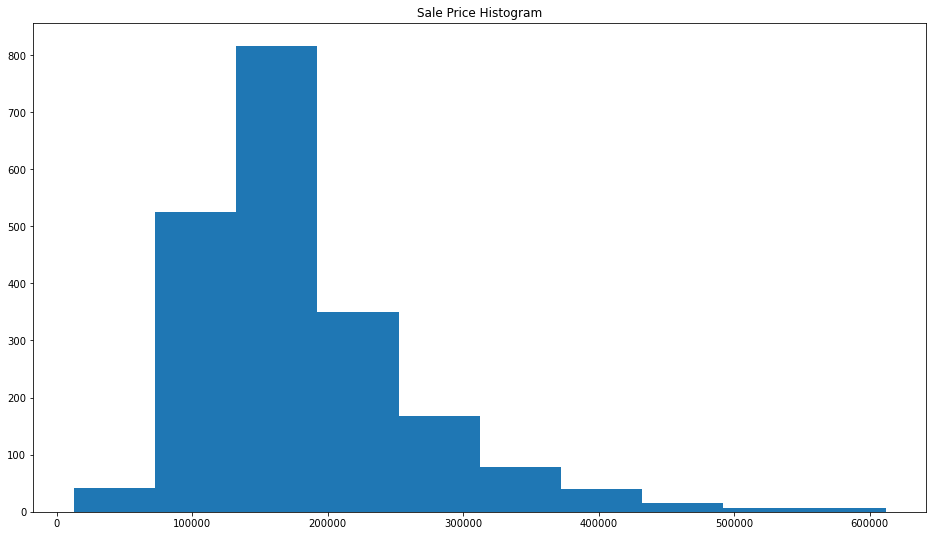

In [6]:
df_train['saleprice'].hist(figsize = (16, 9)).grid(False)
plt.title('Sale Price Histogram')

plt.savefig('../images/saleprice')

Sale Price is skewed and should be fixed to have a better fitting model

In [7]:
df_train['salepricelog'] = np.log(df_train['saleprice'])

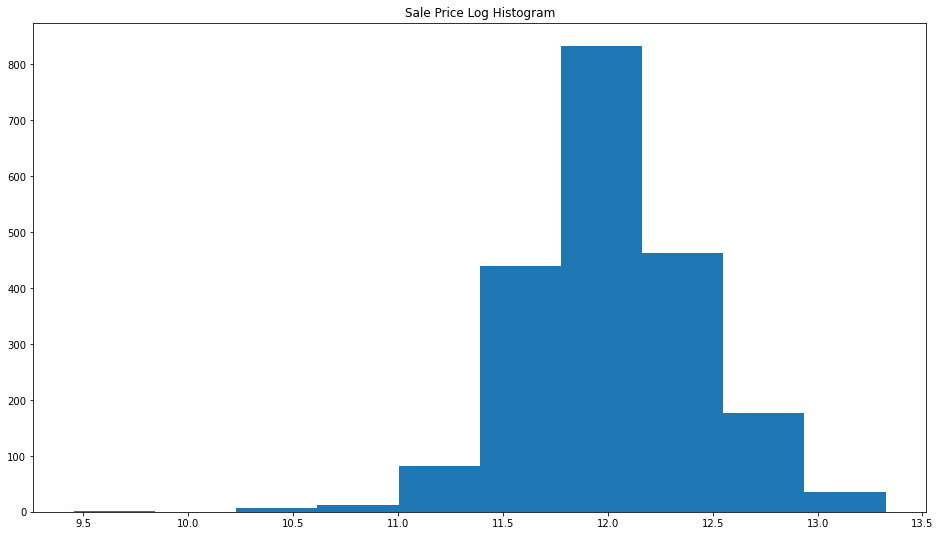

In [8]:
df_train['salepricelog'].hist(figsize = (16, 9)).grid(False)
plt.title('Sale Price Log Histogram')

plt.savefig('../images/salepricelog')

Much better

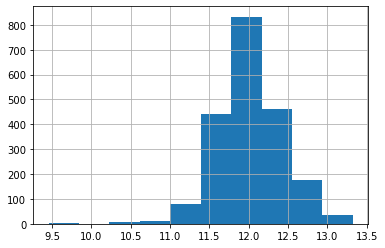

In [9]:
df_train['salepricelog'].hist();

I will now go through all categorical data and try to find those I can transform into features that will improve my model

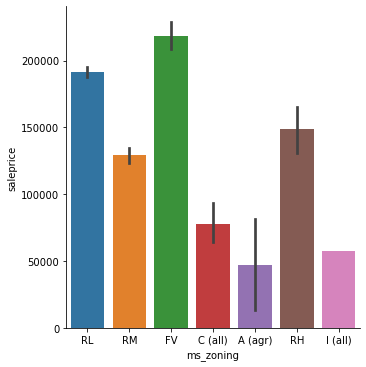

In [10]:
sns.catplot(data = df_train, y = 'saleprice', x = 'ms_zoning', kind = 'bar');

In [11]:
df_train['ms_zoning'].value_counts()

RL         1596
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

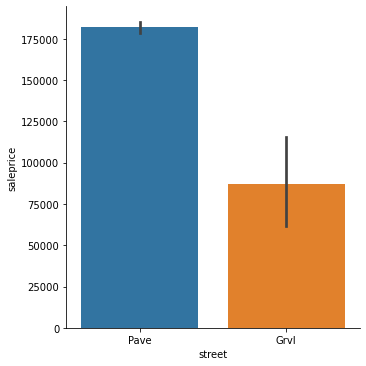

In [12]:
sns.catplot(data = df_train, y = 'saleprice', x = 'street', kind = 'bar');

In [13]:
df_train['street'].value_counts()

Pave    2042
Grvl       7
Name: street, dtype: int64

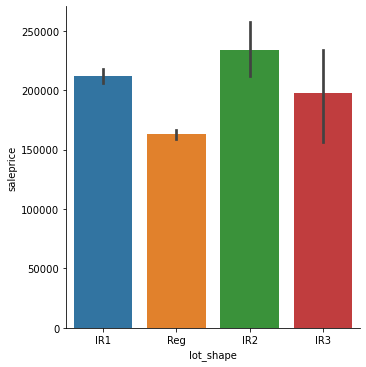

In [14]:
sns.catplot(data = df_train, y = 'saleprice', x = 'lot_shape', kind = 'bar');

In [15]:
df_train['lot_shape'].value_counts()

Reg    1295
IR1     691
IR2      55
IR3       8
Name: lot_shape, dtype: int64

Shows promise as a feature

In [16]:
df_train.lot_shape = df_train.lot_shape.str.replace('Reg','1')
df_train.lot_shape = df_train.lot_shape.str.replace('IR1','0')
df_train.lot_shape = df_train.lot_shape.str.replace('IR2','0')
df_train.lot_shape = df_train.lot_shape.str.replace('IR3','0')

df_train.rename(columns = {"lot_shape" : "regular_lot"}, inplace = True)

df_train['regular_lot'] = df_train['regular_lot'].astype(int)

Binarizing regular lots vs irregular lots

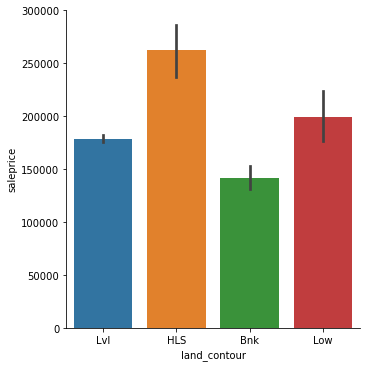

In [17]:
sns.catplot(data = df_train, y = 'saleprice', x = 'land_contour', kind = 'bar');

In [18]:
df_train['land_contour'].value_counts()

Lvl    1843
HLS      85
Bnk      78
Low      43
Name: land_contour, dtype: int64

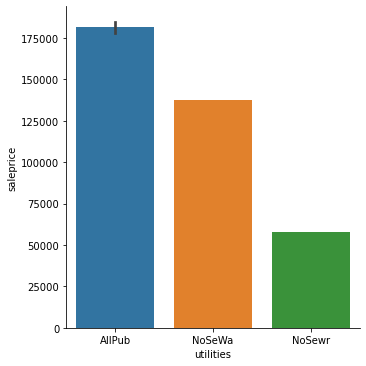

In [19]:
sns.catplot(data = df_train, y = 'saleprice', x = 'utilities', kind = 'bar');

In [20]:
df_train['utilities'].value_counts()

AllPub    2047
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

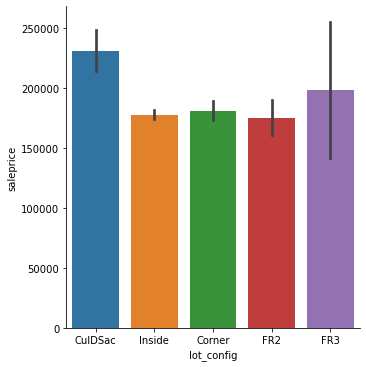

In [21]:
sns.catplot(data = df_train, y = 'saleprice', x = 'lot_config', kind = 'bar');

In [22]:
df_train['lot_config'].value_counts()

Inside     1502
Corner      347
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

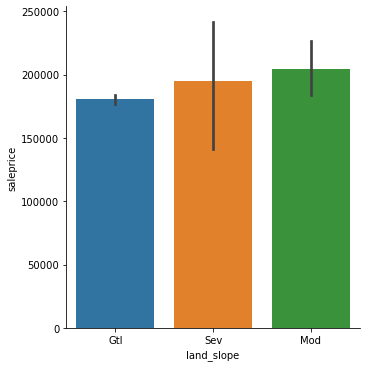

In [23]:
sns.catplot(data = df_train, y = 'saleprice', x = 'land_slope', kind = 'bar');

In [24]:
df_train['land_slope'].value_counts()

Gtl    1951
Mod      88
Sev      10
Name: land_slope, dtype: int64

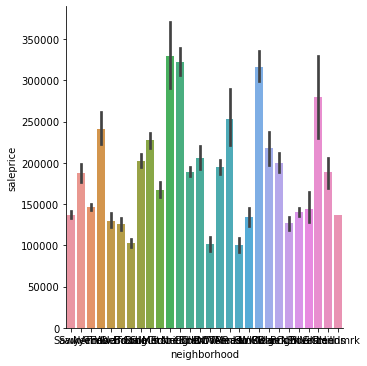

In [25]:
sns.catplot(data = df_train, y = 'saleprice', x = 'neighborhood', kind = 'bar');

In [26]:
df_train['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

Making a note to my self to create dummy columns for neighborhoods in the relevant models

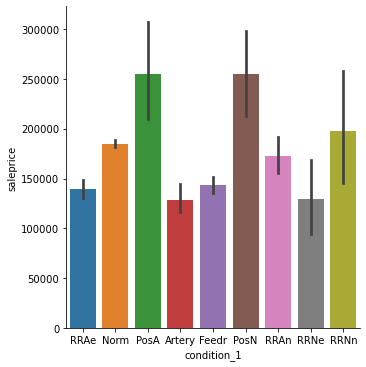

In [27]:
sns.catplot(data = df_train, y = 'saleprice', x = 'condition_1', kind = 'bar');

In [28]:
df_train['condition_1'].value_counts()

Norm      1766
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

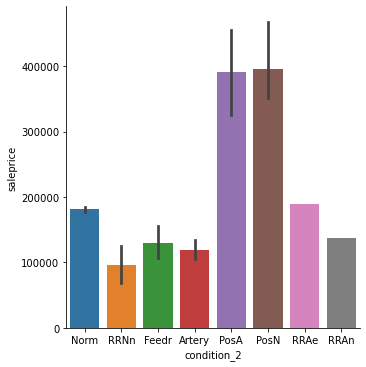

In [29]:
sns.catplot(data = df_train, y = 'saleprice', x = 'condition_2', kind = 'bar');

In [30]:
df_train['condition_2'].value_counts()

Norm      2023
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: condition_2, dtype: int64

Tempting to make a railroad or park adjacency column, but both are under 5% of data

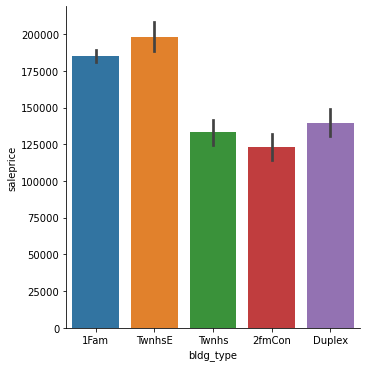

In [31]:
sns.catplot(data = df_train, y = 'saleprice', x = 'bldg_type', kind = 'bar');

In [32]:
df_train['bldg_type'].value_counts()

1Fam      1698
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

Still not great data spread.

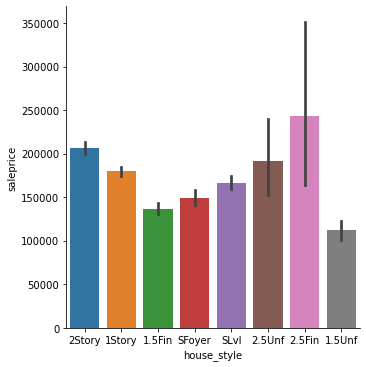

In [33]:
sns.catplot(data = df_train, y = 'saleprice', x = 'house_style', kind = 'bar');

In [34]:
df_train['house_style'].value_counts()

1Story    1058
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

Shows promise as a feature

In [35]:
df_train.house_style = df_train.house_style.str.replace('1Story','1')
df_train.house_style = df_train.house_style.str.replace('2Story','2')
df_train.house_style = df_train.house_style.str.replace('1.5Fin','1.5')
df_train.house_style = df_train.house_style.str.replace('1.5Unf','1.5')
df_train.house_style = df_train.house_style.str.replace('SLvl','1.5')
df_train.house_style = df_train.house_style.str.replace('SFoyer','1.5')
df_train.house_style = df_train.house_style.str.replace('2.5Unf','2.5')
df_train.house_style = df_train.house_style.str.replace('2.5Fin','2.5')

df_train.rename(columns = {"house_style" : "house_floors"}, inplace = True)

df_train['house_floors'] = df_train['house_floors'].astype(float)

<ipython-input-35-6d4d891d5cbf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train.house_style = df_train.house_style.str.replace('1.5Fin','1.5')
<ipython-input-35-6d4d891d5cbf>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train.house_style = df_train.house_style.str.replace('1.5Unf','1.5')
<ipython-input-35-6d4d891d5cbf>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train.house_style = df_train.house_style.str.replace('2.5Unf','2.5')
<ipython-input-35-6d4d891d5cbf>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train.house_style = df_train.house_style.str.replace('2.5Fin','2.5')


Converting data into amount of floors

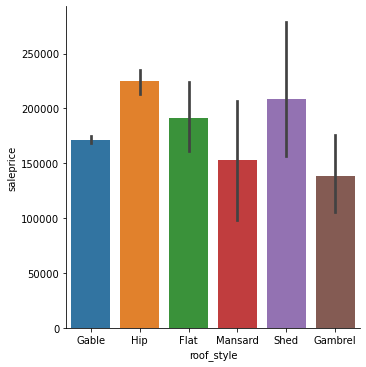

In [36]:
sns.catplot(data = df_train, y = 'saleprice', x = 'roof_style', kind = 'bar');

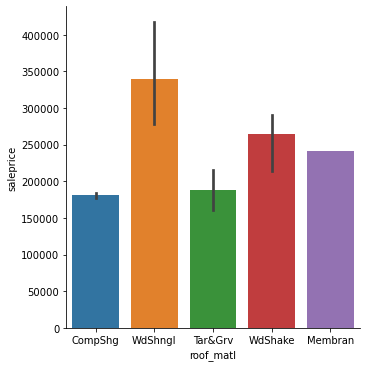

In [37]:
sns.catplot(data = df_train, y = 'saleprice', x = 'roof_matl', kind = 'bar');

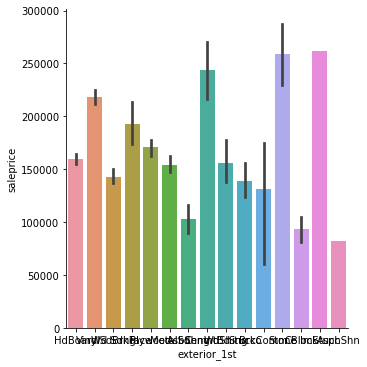

In [38]:
sns.catplot(data = df_train, y = 'saleprice', x = 'exterior_1st', kind = 'bar');

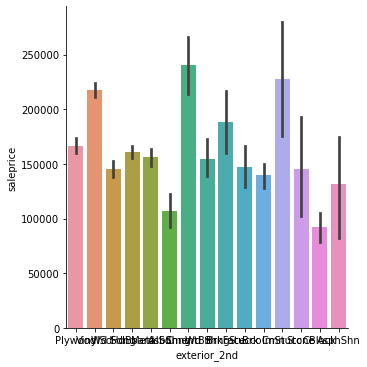

In [39]:
sns.catplot(data = df_train, y = 'saleprice', x = 'exterior_2nd', kind = 'bar');

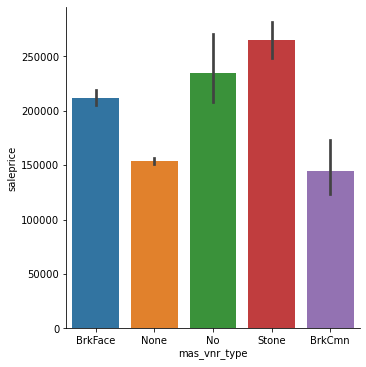

In [40]:
sns.catplot(data = df_train, y = 'saleprice', x = 'mas_vnr_type', kind = 'bar');

In [41]:
df_train['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       166
No           22
BrkCmn       13
Name: mas_vnr_type, dtype: int64

Shows promise as a feature

In [42]:
df_train.mas_vnr_type = df_train.mas_vnr_type.str.replace('None','0')
df_train.mas_vnr_type = df_train.mas_vnr_type.str.replace('No','0')
df_train.mas_vnr_type = df_train.mas_vnr_type.str.replace('BrkCmn','0')
df_train.mas_vnr_type = df_train.mas_vnr_type.str.replace('BrkFace','1')
df_train.mas_vnr_type = df_train.mas_vnr_type.str.replace('Stone','1')

df_train.rename(columns = {"mas_vnr_type" : "fancy_masonry"}, inplace = True)

df_train['fancy_masonry'] = df_train['fancy_masonry'].astype(int)

Brick Face and stone are higher quality materials than the rest, so binarizing this data

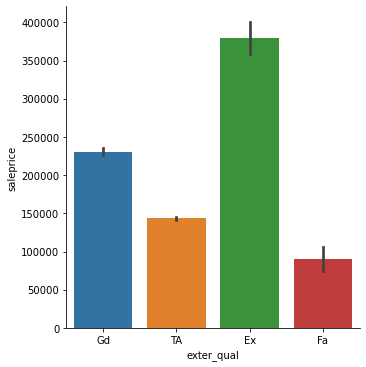

In [43]:
sns.catplot(data = df_train, y = 'saleprice', x = 'exter_qual', kind = 'bar');

In [44]:
df_train['exter_qual'].value_counts()

TA    1247
Gd     697
Ex      79
Fa      26
Name: exter_qual, dtype: int64

Shows promise as a feature

In [45]:
df_train.exter_qual = df_train.exter_qual.str.replace('TA','0')
df_train.exter_qual = df_train.exter_qual.str.replace('Gd','1')
df_train.exter_qual = df_train.exter_qual.str.replace('Ex','1')
df_train.exter_qual = df_train.exter_qual.str.replace('Fa','0')

df_train.rename(columns = {"exter_qual" : "exter_exc"}, inplace = True)

df_train['exter_exc'] = df_train['exter_exc'].astype(int)

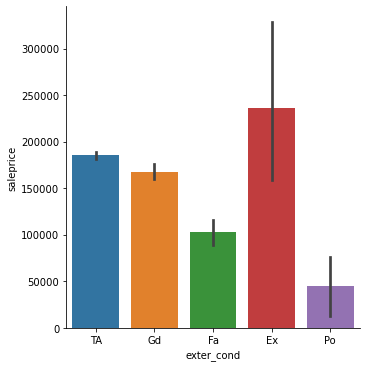

In [46]:
sns.catplot(data = df_train, y = 'saleprice', x = 'exter_cond', kind = 'bar');

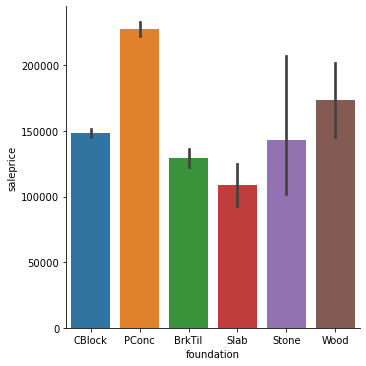

In [47]:
sns.catplot(data = df_train, y = 'saleprice', x = 'foundation', kind = 'bar');

In [48]:
df_train['foundation'].value_counts()

PConc     924
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64

Shows promise as a feature

In [49]:
df_train.foundation = df_train.foundation.str.replace('PConc','1')
df_train.foundation = df_train.foundation.str.replace('CBlock','0')
df_train.foundation = df_train.foundation.str.replace('Slab','0')
df_train.foundation = df_train.foundation.str.replace('Stone','0')
df_train.foundation = df_train.foundation.str.replace('Wood','0')
df_train.foundation = df_train.foundation.str.replace('BrkTil','0')

df_train.rename(columns = {"foundation" : "conc_found"}, inplace = True)

df_train['conc_found'] = df_train['conc_found'].astype(int)

Concrete is found in markedly more expensive houses, so binarizing column

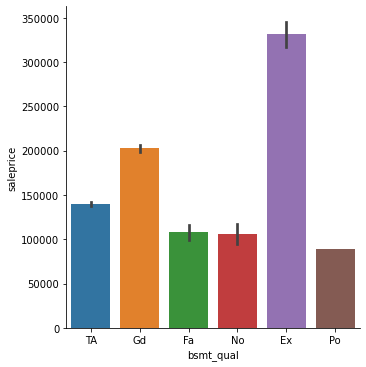

In [50]:
sns.catplot(data = df_train, y = 'saleprice', x = 'bsmt_qual', kind = 'bar');

In [51]:
df_train['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    182
Fa     60
No     55
Po      1
Name: bsmt_qual, dtype: int64

Shows promise as a feature

In [52]:
df_train.bsmt_qual = df_train.bsmt_qual.str.replace('TA','0')
df_train.bsmt_qual = df_train.bsmt_qual.str.replace('Gd','1')
df_train.bsmt_qual = df_train.bsmt_qual.str.replace('Ex','1')
df_train.bsmt_qual = df_train.bsmt_qual.str.replace('Fa','0')
df_train.bsmt_qual = df_train.bsmt_qual.str.replace('Po','0')
df_train.bsmt_qual = df_train.bsmt_qual.str.replace('No','0')

df_train.rename(columns = {"bsmt_qual" : "bsmt_exc"}, inplace = True)

df_train['bsmt_exc'] = df_train['bsmt_exc'].astype(int)

I will transforming all quality categories into those that are better than average and those that are not

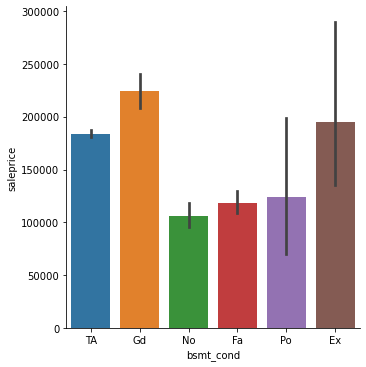

In [53]:
sns.catplot(data = df_train, y = 'saleprice', x = 'bsmt_cond', kind = 'bar');

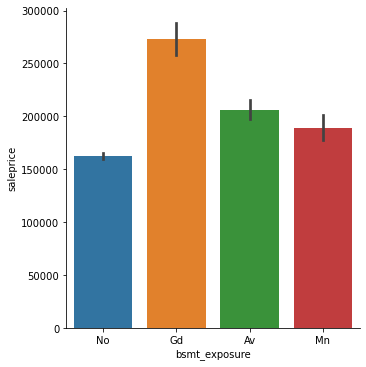

In [54]:
sns.catplot(data = df_train, y = 'saleprice', x = 'bsmt_exposure', kind = 'bar');

In [55]:
df_train['bsmt_exposure'].value_counts()

No    1397
Av     288
Gd     201
Mn     163
Name: bsmt_exposure, dtype: int64

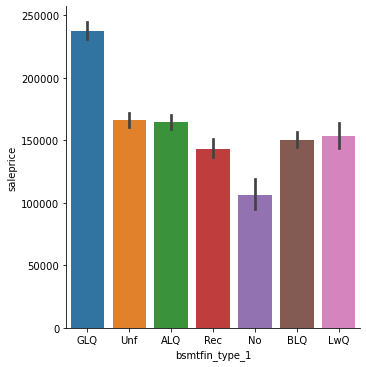

In [56]:
sns.catplot(data = df_train, y = 'saleprice', x = 'bsmtfin_type_1', kind = 'bar');

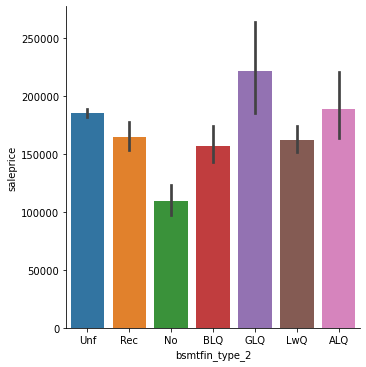

In [57]:
sns.catplot(data = df_train, y = 'saleprice', x = 'bsmtfin_type_2', kind = 'bar');

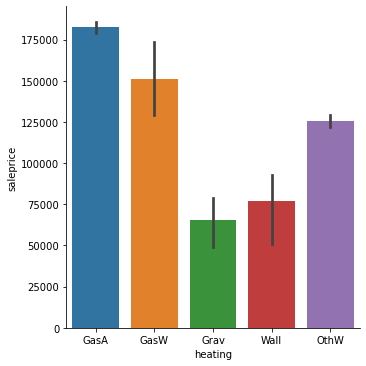

In [58]:
sns.catplot(data = df_train, y = 'saleprice', x = 'heating', kind = 'bar');

In [59]:
df_train['heating'].value_counts()

GasA    2016
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64

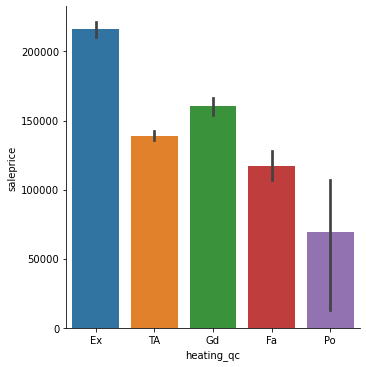

In [60]:
sns.catplot(data = df_train, y = 'saleprice', x = 'heating_qc', kind = 'bar');

In [61]:
df_train['heating_qc'].value_counts()

Ex    1063
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

Shows promise as a feature

In [62]:
df_train.heating_qc = df_train.heating_qc.str.replace('TA','0')
df_train.heating_qc = df_train.heating_qc.str.replace('Gd','1')
df_train.heating_qc = df_train.heating_qc.str.replace('Ex','1')
df_train.heating_qc = df_train.heating_qc.str.replace('Fa','0')
df_train.heating_qc = df_train.heating_qc.str.replace('Po','0')

df_train.rename(columns = {"heating_qc" : "heating_exc"}, inplace = True)

df_train['heating_exc'] = df_train['heating_exc'].astype(int)

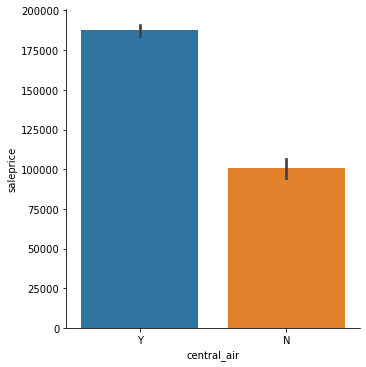

In [63]:
sns.catplot(data = df_train, y = 'saleprice', x = 'central_air', kind = 'bar');

In [64]:
df_train['central_air'].value_counts()

Y    1908
N     141
Name: central_air, dtype: int64

Shows promise as a feature

In [65]:
df_train.central_air = df_train.central_air.str.replace('N','0')
df_train.central_air = df_train.central_air.str.replace('Y','1')

df_train['central_air'] = df_train['central_air'].astype(int)

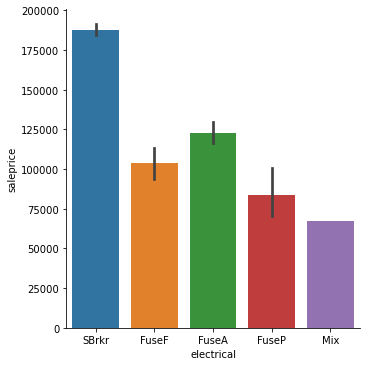

In [66]:
sns.catplot(data = df_train, y = 'saleprice', x = 'electrical', kind = 'bar');

In [67]:
df_train['electrical'].value_counts()

SBrkr    1866
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

Shows promise as a feature

In [68]:
df_train.electrical = df_train.electrical.str.replace('SBrkr','1')
df_train.electrical = df_train.electrical.str.replace('FuseA','0')
df_train.electrical = df_train.electrical.str.replace('FuseF','0')
df_train.electrical = df_train.electrical.str.replace('FuseP','0')
df_train.electrical = df_train.electrical.str.replace('Mix','0')

df_train.rename(columns = {"electrical" : "stand_elec"}, inplace = True)

df_train['stand_elec'] = df_train['stand_elec'].astype(int)

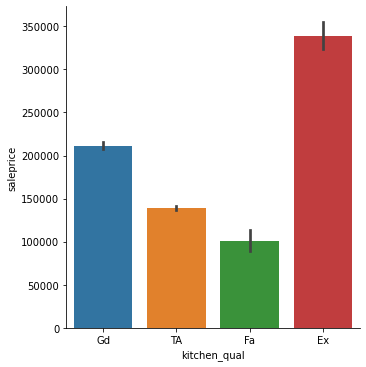

In [69]:
sns.catplot(data = df_train, y = 'saleprice', x = 'kitchen_qual', kind = 'bar');

In [70]:
df_train['kitchen_qual'].value_counts()

TA    1047
Gd     806
Ex     149
Fa      47
Name: kitchen_qual, dtype: int64

Shows promise as a feature

In [71]:
df_train.kitchen_qual = df_train.kitchen_qual.str.replace('TA','0')
df_train.kitchen_qual = df_train.kitchen_qual.str.replace('Gd','1')
df_train.kitchen_qual = df_train.kitchen_qual.str.replace('Ex','1')
df_train.kitchen_qual = df_train.kitchen_qual.str.replace('Fa','0')

df_train.rename(columns = {"kitchen_qual" : "kitchen_exc"}, inplace = True)

df_train['kitchen_exc'] = df_train['kitchen_exc'].astype(int)

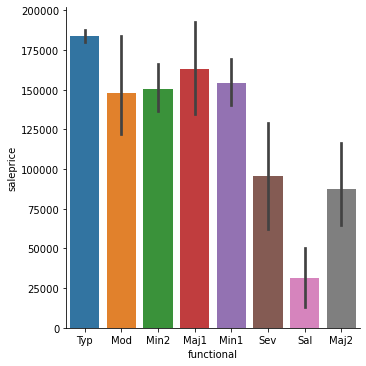

In [72]:
sns.catplot(data = df_train, y = 'saleprice', x = 'functional', kind = 'bar');

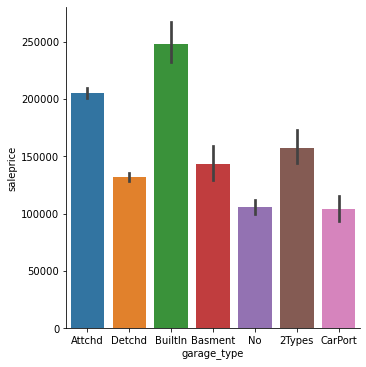

In [73]:
sns.catplot(data = df_train, y = 'saleprice', x = 'garage_type', kind = 'bar');

In [74]:
df_train['garage_type'].value_counts()

Attchd     1211
Detchd      536
BuiltIn     132
No          113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

Shows promise as a feature

In [75]:
df_train.garage_type = df_train.garage_type.str.replace('Attchd','1')
df_train.garage_type = df_train.garage_type.str.replace('Detchd','0')
df_train.garage_type = df_train.garage_type.str.replace('BuiltIn','1')
df_train.garage_type = df_train.garage_type.str.replace('No','0')
df_train.garage_type = df_train.garage_type.str.replace('Basment','0')
df_train.garage_type = df_train.garage_type.str.replace('2Types','1')
df_train.garage_type = df_train.garage_type.str.replace('CarPort','0')

df_train.rename(columns = {"garage_type" : "garage_connect"}, inplace = True)

df_train['garage_connect'] = df_train['garage_connect'].astype(int)

Binarizing garages that are laterally connected to the house vs those that aren't

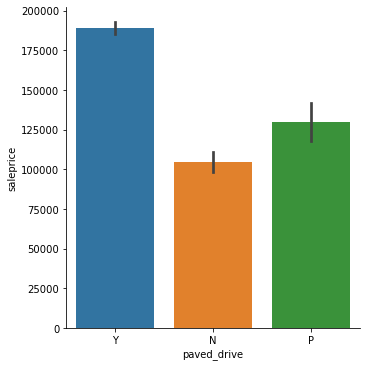

In [76]:
sns.catplot(data = df_train, y = 'saleprice', x = 'paved_drive', kind = 'bar');

In [77]:
df_train['paved_drive'].value_counts()

Y    1859
N     151
P      39
Name: paved_drive, dtype: int64

Shows promise as a feature

In [78]:
df_train.paved_drive = df_train.paved_drive.str.replace('N','0')
df_train.paved_drive = df_train.paved_drive.str.replace('P','0')
df_train.paved_drive = df_train.paved_drive.str.replace('Y','1')

df_train['paved_drive'] = df_train['paved_drive'].astype(int)

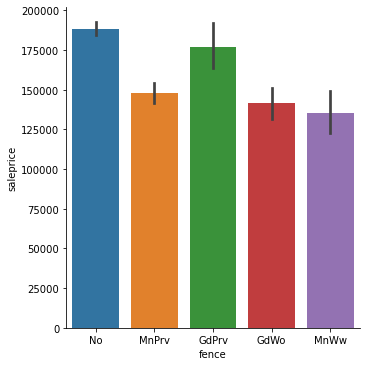

In [79]:
sns.catplot(data = df_train, y = 'saleprice', x = 'fence', kind = 'bar');

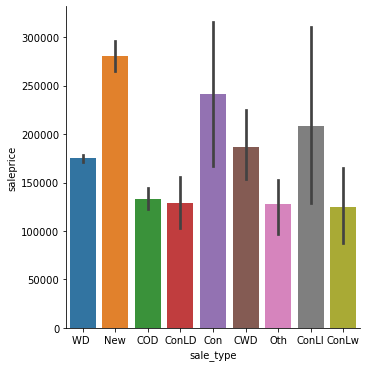

In [80]:
sns.catplot(data = df_train, y = 'saleprice', x = 'sale_type', kind = 'bar');

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   pid              2049 non-null   int64  
 2   ms_subclass      2049 non-null   int64  
 3   ms_zoning        2049 non-null   object 
 4   lot_area         2049 non-null   int64  
 5   street           2049 non-null   object 
 6   regular_lot      2049 non-null   int32  
 7   land_contour     2049 non-null   object 
 8   utilities        2049 non-null   object 
 9   lot_config       2049 non-null   object 
 10  land_slope       2049 non-null   object 
 11  neighborhood     2049 non-null   object 
 12  condition_1      2049 non-null   object 
 13  condition_2      2049 non-null   object 
 14  bldg_type        2049 non-null   object 
 15  house_floors     2049 non-null   float64
 16  overall_qual     2049 non-null   int64  
 17  overall_cond  

In [82]:
df_train['over_exc'] = (df_train['exter_exc'] + df_train['bsmt_exc'] + df_train['heating_exc'] + df_train['kitchen_exc']) ** 2
df_train['qual_sqaure'] = df_train['overall_qual'] ** 2
df_train['exc_x_qual'] = df_train['qual_sqaure'] * df_train['over_exc']

Some more transformative columns before I check for correlation

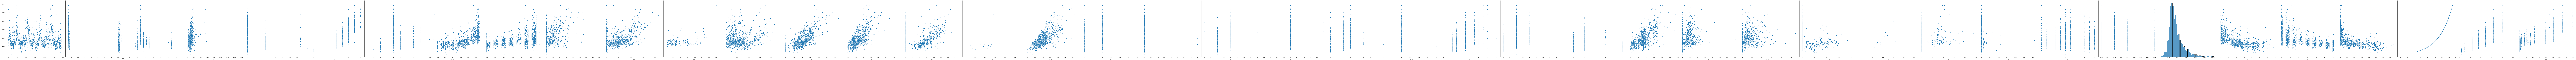

In [83]:
sns.pairplot(data = df_train, y_vars = ['saleprice'], x_vars = df_train.select_dtypes(include = ['float64', 'int64']), height = 10);

In [84]:
df_train = df_train[df_train['lot_area'] < 8000]
df_train = df_train[df_train['mas_vnr_area'] < 1200]
df_train = df_train[df_train['total_bsmt_sf'] < 3000]
df_train = df_train[df_train['1st_flr_sf'] < 3500]
df_train = df_train[df_train['lot_area'] < 8000]
df_train = df_train[df_train['garage_cars'] < 4]
df_train = df_train[df_train['wood_deck_sf'] < 1000]

Looking for and removing outliers

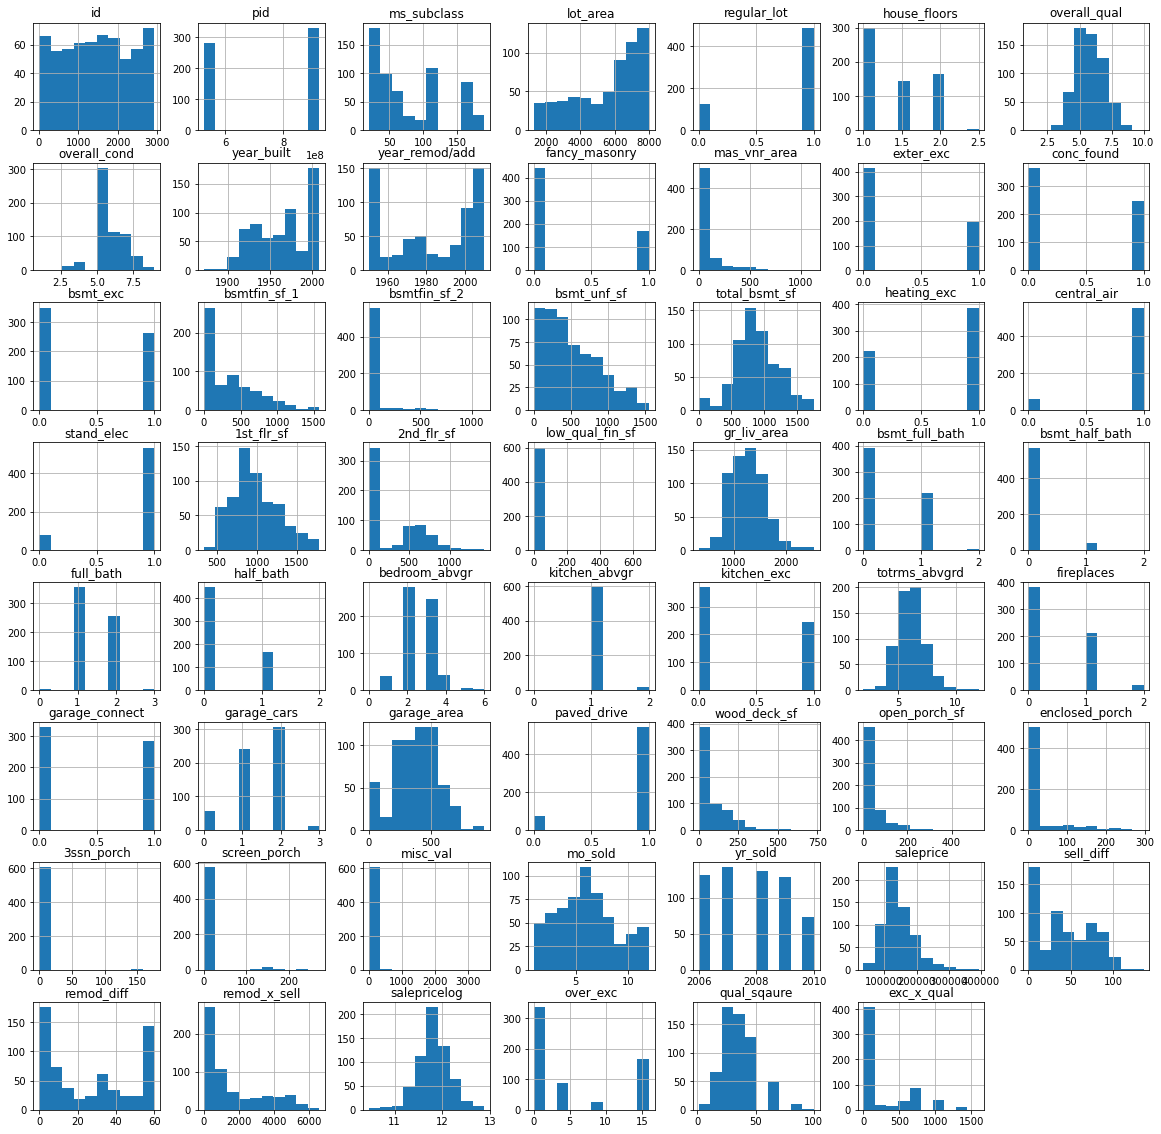

In [85]:
df_train.hist(figsize = (20, 20));

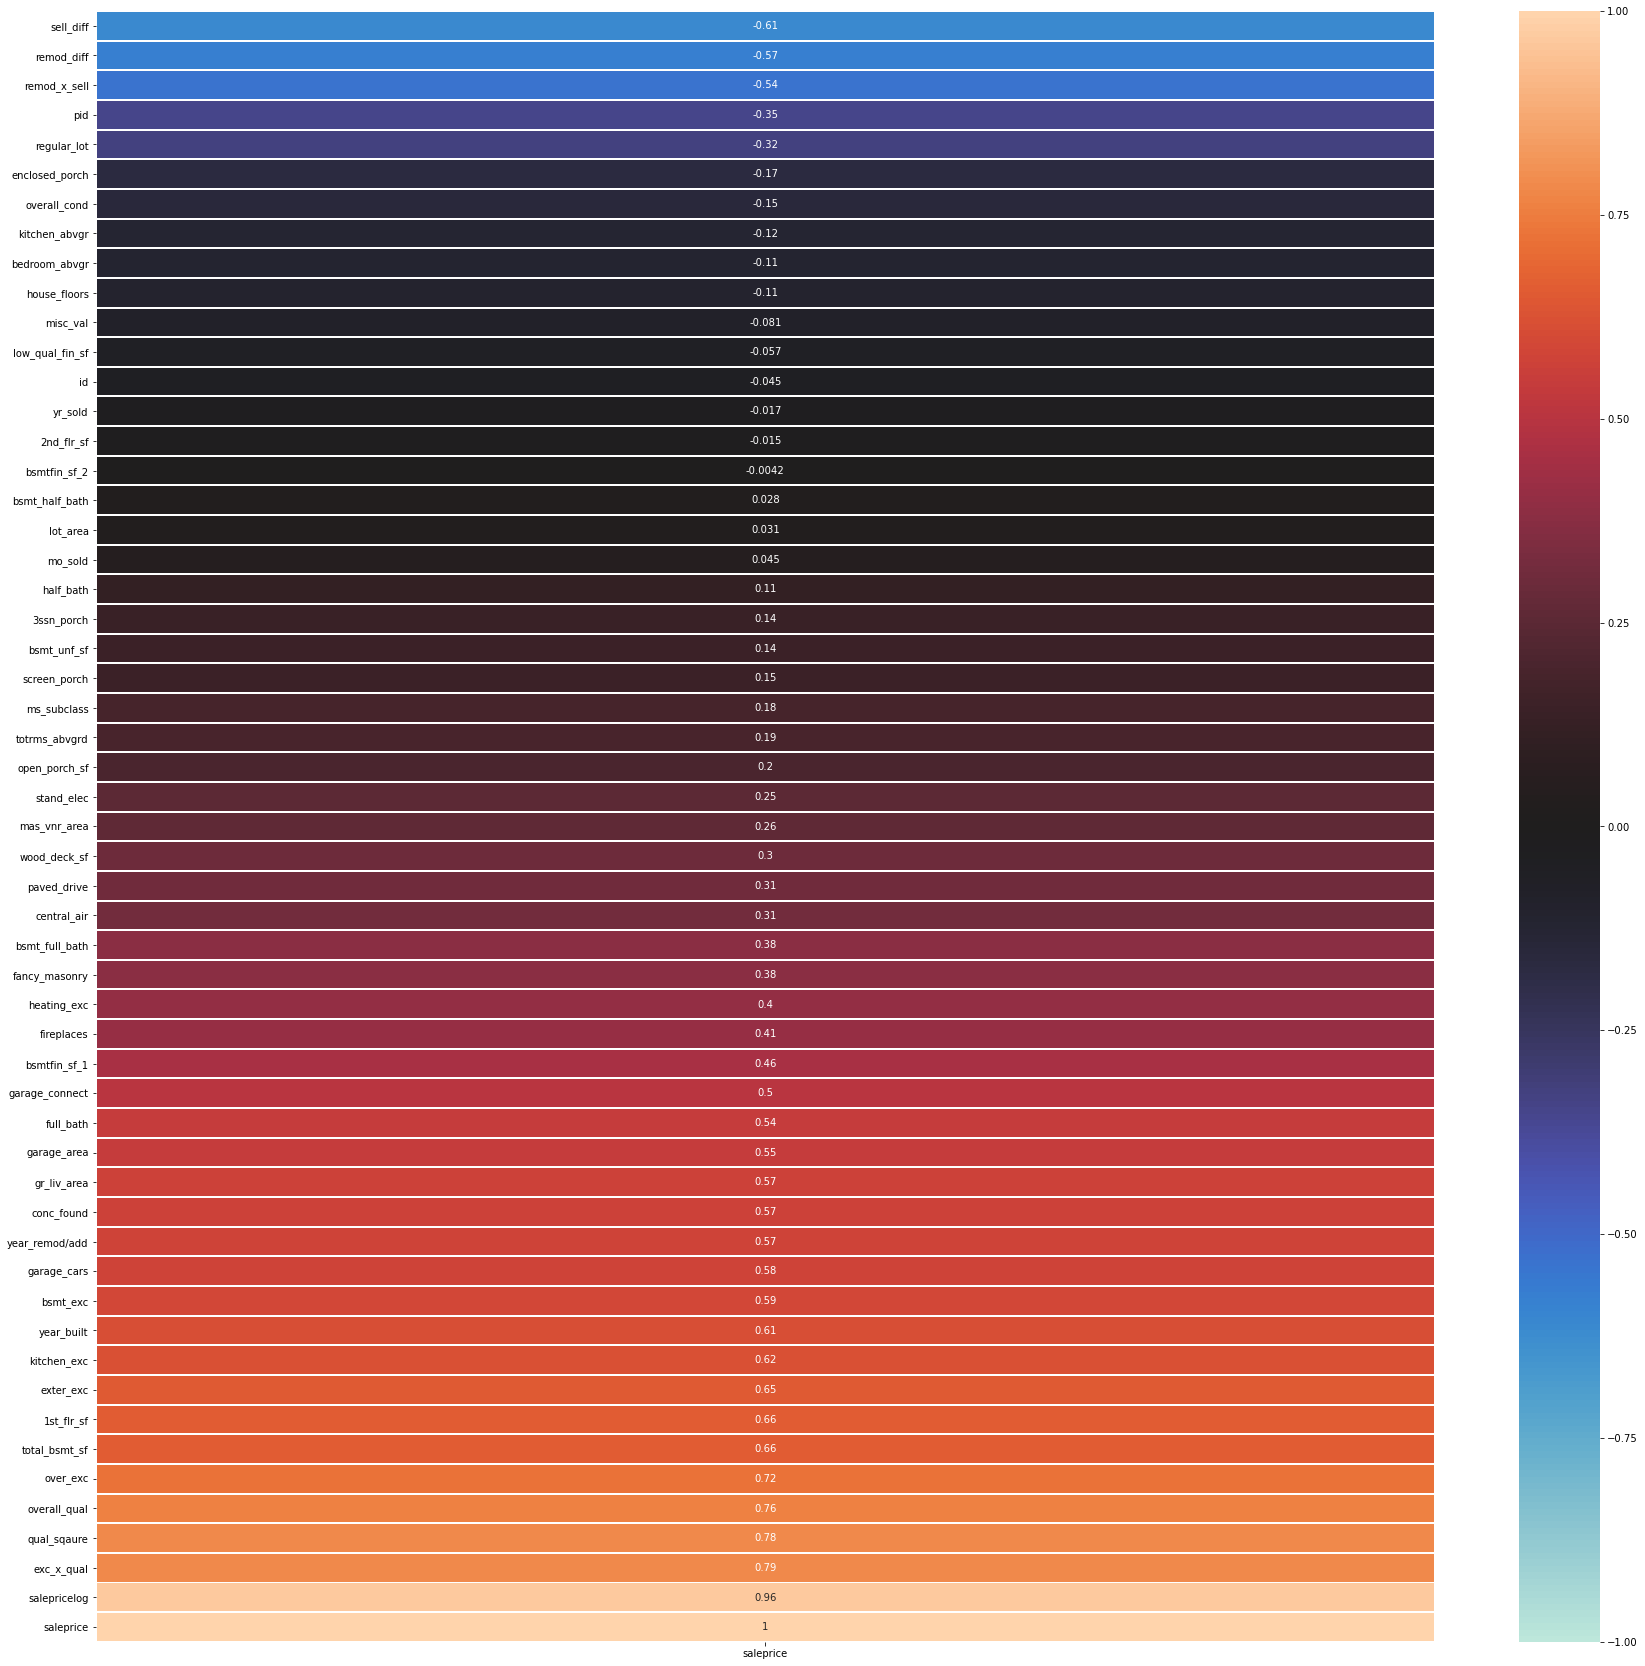

In [86]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice'), annot=True, vmin=-1, vmax=1, linewidths=1, center = 0);

Features with an absolute value of .5 or greater were ultimately chosen for modeling as they had the greatest impact on the R2 scores while keeping overfitting to a minumum. While a lot of new features look promising, some did not perform as well ('regular_lot', 'fancy_masonry', 'paved_drive', 'heating_exc', 'central_air', 'stan_elec'). Also, only one was truly poor feature, which, surprisingly, was 'house_floors'. I would have been confident prior to this project that an increase in floors would lead to an increase in price, although how to evaluate split floors might come into play with this poor correlation.<br><br>

In [87]:
df_train.to_csv('../datasets/train_ready.csv')